In [1]:
import library_assignment1 as lib
import math
from prettytable import PrettyTable
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D



In [2]:
#question 1
#fixed point method
def function(x):
    return math.exp(-x)
#we are setting the tolerance of 0.000001
q1=lib.non_linear_equation_1D(function,None,None,None,.000001)
#take initial guess 0
guess=0
root,n= q1.fixed_point(guess)

# Displaying the result upto 4 decimal points
print("Root of the equation, x = ", round(root,4))
print("Number of steps to reach this when initial guess is 0: ", n)





Root of the equation, x =  0.5671
Number of steps to reach this when initial guess is 0:  26


In [3]:
#question 2
#Simpson’s rule and Gaussian quadrature

def integration(x):
    return math.sqrt(1+(x**4))
#now we are defining the integration limit and number of intervels
a = 0
b = 1
N = 100
#now we will integrate using all methodes
int1=lib.Integration_1(integration,a,b,N)
midpoint=int1.midpoint()
trapezoidal=int1.trapezoidal()
simpsons=int1.simpsons()

#Gaussian Quadrature
degree = 3
int2 = lib.Gaussian_Quadrature(integration,a,b,degree)
gaussian_quad=int2.integrate()

# result
list1=[simpsons,midpoint,trapezoidal,gaussian_quad]
list2=["Simpson's method","Midpoint method","Trapezoidal method","Gaussian Quadrature"]

# creating pretty table
table_1 = PrettyTable()
table_1.field_names = ["Method","Integration result"]
for i in range(len(list1)):
    table_1.add_row([list2[i],round(list1[i],6)])
print(table_1)

+---------------------+--------------------+
|        Method       | Integration result |
+---------------------+--------------------+
|   Simpson's method  |      1.089429      |
|   Midpoint method   |      1.089424      |
|  Trapezoidal method |      1.089441      |
| Gaussian Quadrature |      1.089459      |
+---------------------+--------------------+


The first 17 values of (x,y) for each h is tabulated.
+---------------+---------------+----------------+----------------+
|     h=0.5     |     h=0.2     |     h=0.05     |     h=0.01     |
+---------------+---------------+----------------+----------------+
|     (0,1)     |     (0,1)     |     (0,1)      |     (0,1)      |
| (0.5,0.91319) |  (0.2,0.9378) | (0.05,0.98213) | (0.01,0.99634) |
| (1.0,1.07193) | (0.4,0.91044) | (0.1,0.96558)  | (0.02,0.99272) |
| (1.5,1.34978) | (0.6,0.92671) | (0.15,0.9507)  | (0.03,0.98914) |
| (2.0,1.61913) | (0.8,0.98381) |  (0.2,0.9378)  | (0.04,0.98561) |
| (2.5,1.83825) | (1.0,1.07159) | (0.25,0.92713) | (0.05,0.98213) |
|  (3.0,2.0055) | (1.2,1.17783) | (0.3,0.91892)  | (0.06,0.97871) |
| (3.5,2.12975) | (1.4,1.29196) | (0.35,0.91332) | (0.07,0.97533) |
| (4.0,2.22076) | (1.6,1.40636) | (0.4,0.91044)  | (0.08,0.97202) |
|  (4.5,2.2868) | (1.8,1.51623) | (0.45,0.91035) | (0.09,0.96877) |
| (5.0,2.33433) |  (2.0,1.6189) | (0.5,0.91306)  | (0.1,0.9655

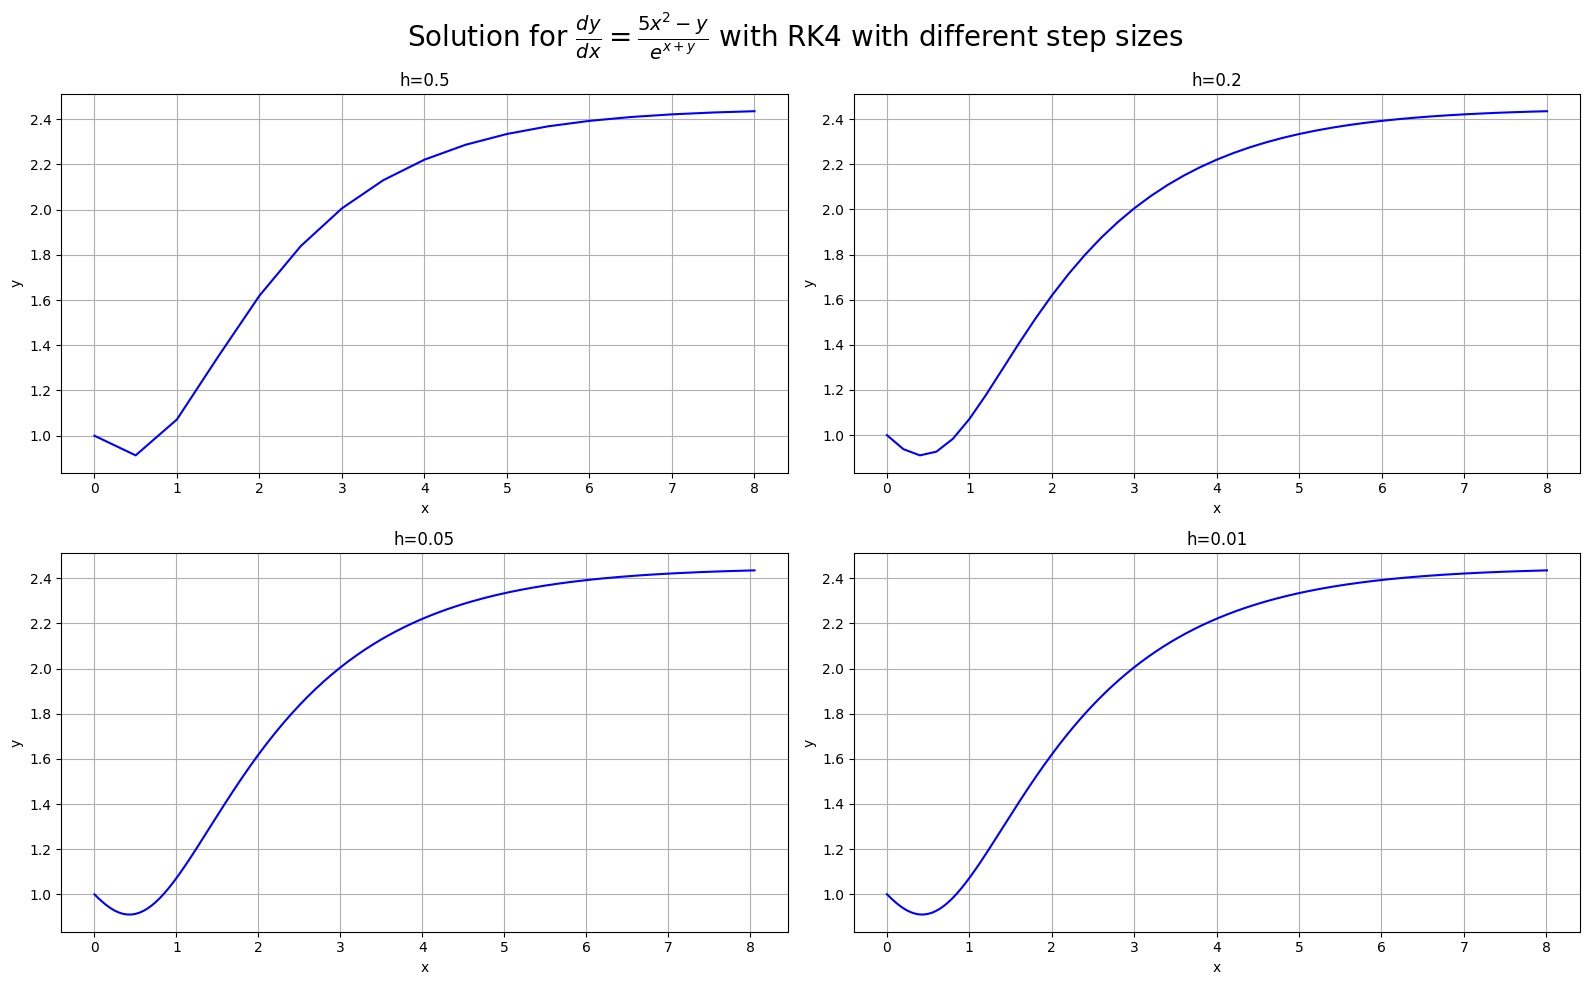

In [4]:
#question 3
#RK4 with different step sizes
#for small step sizes it took many steps to converge
#so in the table only 17 steps are shown which was the minimum value of steps among all h
#function dy/dx
def diffeq(x,y):
    return (5*x**2-y)/(math.exp(x+y))

# defining the limits and number of intervals
p = 0
q = 8
y0=1
#input all the step sizes into a list
hlist=[0.5,0.2,0.05,0.01]
Nlist=[int((q-p)/h) for h in hlist]

# Calculating the y(x) using Runge-Kutta Method
XYlist=[[],[],[],[]]
for i in range(len(hlist)):
    sol=lib.ODE_Solve_XY(diffeq,p,y0,q,Nlist[i])
    x,y=sol.RK4_solve()
    XYlist[i].append(x) 
    XYlist[i].append(y)
    del sol
    del x
    del y

# Displaying the result in table
table_2 = PrettyTable()
htablelist=[f"h={hlist[i]}" for i in range(len(hlist))]
table_2.field_names = htablelist
min_len=min([len(XYlist[i][0]) for i in range(len(hlist))])



for i in range(min_len):
    table_2.add_row([f"({round(XYlist[j][0][i],5)},{round(XYlist[j][1][i],5)})" for j in range(len(hlist))])

print(f"The first {min_len} values of (x,y) for each h is tabulated.")    
print(table_2)

for i in range(len(hlist)):
    last_x = XYlist[i][0][-1]
    last_y = XYlist[i][1][-1]
    print(f"For h = {hlist[i]},it took {len(XYlist[i][0])} steps, the last (x, y) value is: ({round(last_x, 5)}, {round(last_y, 5)})")
print("The solutions are plotted below using all step sizes.")
fig, axs = plt.subplots(2, 2, figsize=(16, 10))
for i in range(len(hlist)):
    axs[i//2, i%2].plot(XYlist[i][0], XYlist[i][1],color='b')
    axs[i//2, i%2].set_title(f"h={hlist[i]}")
    axs[i//2, i%2].set_xlabel("x")
    axs[i//2, i%2].set_ylabel("y")
    axs[i//2, i%2].grid()
fig.suptitle(r'Solution for $\frac{dy}{dx} = \frac{5x^2-y}{e^{x+y}}$ with RK4 with different step sizes',fontsize=20)
plt.tight_layout()

plt.show()



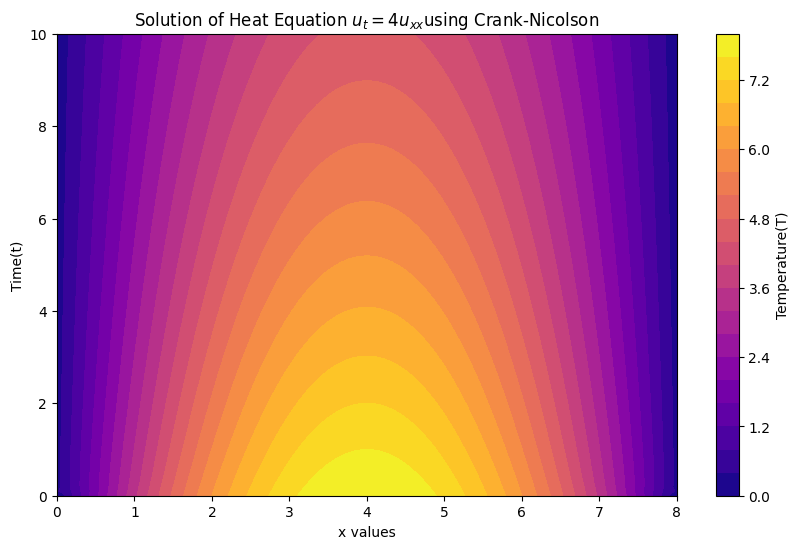

here α =  0.39999999999999997
The choice of α is based on the Courant-Friedrichs-Lewy (CFL) condition,we took C=0.5.
C=α*(dx/dt)
This ensures stability and convergence. We have calculated dx and alpha in the generalised code in library and dt is an input.
Inbuilt python function were used to calculate the inverses and to construct vectors.
numpy.linalg.inv function in NumPy uses LU (Lower-Upper) decomposition with partial pivoting for numerical stability and accuracy when computing matrix inverses.


In [5]:
#question 4
#heat equation using Crank-Nicolson
#x and t grids

# define parameters
nodes = 101                                 # more number of nodes = better resolution
length = 8.0                                # Length of the domain,we take x_final=8 from question
time_steps = 100                            # Number of time steps
dt=0.1                                      # Time step size


#dx is calculated from nodes and length in library
#alpha is also calculated inside the code in library
#alpha=(dx/dt)/2
#Courant-Friedrichs-Lewy (CFL) condition,we took C=0.5


#Define initial and boundary conditions
def initial_conditions(x):
    return 4 * x - x ** 2 / 2       
boundary_conditions = (0, 0)  # u(0, t) = 0, u(8, t) = 0


# Solve the heat equation using Crank-Nicolson method
U = lib.crank_nicolson(dt,nodes, length, time_steps, boundary_conditions, initial_conditions)[0]
al=lib.crank_nicolson(dt,nodes, length, time_steps, boundary_conditions, initial_conditions)[1]
# Plotting
x_values = np.linspace(0, length, nodes)
t_values = np.linspace(0, dt * time_steps, time_steps + 1)
X, T = np.meshgrid(x_values, t_values)
plt.figure(figsize=(10, 6)) 
plt.contourf(X, T, U.T, cmap='plasma', levels=20)
plt.colorbar(label='Temperature(T)')
plt.xlabel('x values')
plt.ylabel('Time(t)')
plt.title('Solution of Heat Equation $u_t=4u_{xx} $using Crank-Nicolson')
plt.show()
print("here \u03B1 = ",al)
print("The choice of \u03B1 is based on the Courant-Friedrichs-Lewy (CFL) condition,we took C=0.5.")
print("C=\u03B1*(dx/dt)")
print("This ensures stability and convergence. We have calculated dx and alpha in the generalised code in library and dt is an input.")
print("Inbuilt python function were used to calculate the inverses and to construct vectors.")
print("numpy.linalg.inv function in NumPy uses LU (Lower-Upper) decomposition with partial pivoting for numerical stability and accuracy when computing matrix inverses.")




The grid spacings are: dx = 0.4  and dy = 0.2
+-----+--------+--------+--------+--------+--------+--------+
| x\y |   y0   |   y1   |   y2   |   y3   |   y4   |   y5   |
+-----+--------+--------+--------+--------+--------+--------+
|  x0 | 0.0000 | 0.0000 | 0.0000 | 0.0000 | 0.0000 | 0.0000 |
|  x1 | 0.4000 | 0.3891 | 0.4391 | 0.5562 | 0.7603 | 1.0873 |
|  x2 | 0.8000 | 0.7955 | 0.9066 | 1.1420 | 1.5400 | 2.1746 |
|  x3 | 1.2000 | 1.2425 | 1.4406 | 1.7986 | 2.3678 | 3.2619 |
|  x4 | 1.6000 | 1.7685 | 2.1012 | 2.5939 | 3.2981 | 4.3493 |
|  x5 | 2.0000 | 2.4428 | 2.9836 | 3.6442 | 4.4511 | 5.4366 |
+-----+--------+--------+--------+--------+--------+--------+
The values at each grid is given in the table.
From the table we can see that the boundary conditions are satisfied.


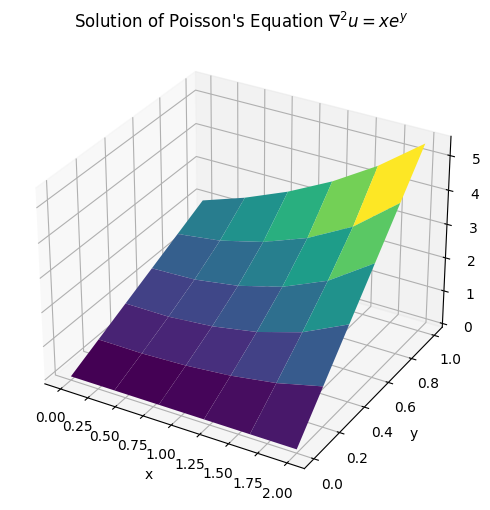

In [6]:
#question 5
#poisson equation solver,grid sixe 6x6
# Define parameters
x_max = 2
x_min = 0
y_max = 1
y_min = 0
#here N_x=N_y
N_x = 6  # Number of grid points in x direction
N_y = 6  # Number of grid points in y direction

dx = (x_max - x_min) / (N_x - 1)  # Grid spacing in x-direction
dy = (y_max - y_min) / (N_y - 1)  # Grid spacing in y-direction
print("The grid spacings are: dx =", dx, " and dy =", dy)

# Define boundary conditions
def LBC(y):           #left boundary condition
    return 0

def RBC(y):           #right boundary condition
    return 2 * np.exp(y)

def BBC(x):           #bottom boundary condition
    return x

def TBC(x):           #top boundary condition
    return x * np.exp(1)

# Initialize the solution matrix
u = np.zeros((N_x, N_y))

# Set boundary conditions
u[0, :] = LBC(np.linspace(y_min, y_max, N_y))
u[-1, :] = RBC(np.linspace(y_min, y_max, N_y))
u[:, 0] = BBC(np.linspace(x_min, x_max, N_x))
u[:, -1] = TBC(np.linspace(x_min, x_max, N_x))

# define function for the RHS of Poisson's equation
def f(x, y):
    return x * np.exp(y)



# Solve Poisson's equation
#inputs are(number of grids, solution matrix, grid spacings and rhs function)
u = lib.solve_poisson(6,u, dx, dy, f)


#tabulate the results
table = PrettyTable()

# Add column headers (y)
table.field_names = ["x\\y"] + [f"y{j}" for j in range(N_y)]

# Add rows with the solution values
for i in range(N_x):
    row = [f"x{i}"] + [f"{u[i, j]:.4f}" for j in range(N_y)]
    table.add_row(row)

# Print the table
print(table)
print("The values at each grid is given in the table.")
print("From the table we can see that the boundary conditions are satisfied.")

# Plot the solution in a 3D plot
X, Y = np.meshgrid(np.linspace(x_min, x_max, N_x), np.linspace(y_min, y_max, N_y))
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, u, cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('u(x, y)')
ax.set_title(r"Solution of Poisson's Equation $\nabla^2u = xe^y$")
plt.show()
